## Exploratory Data Analysis on Corona Virus

## What is a Corona Virus? 

As listed on WHO website, Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

## Objective: 

Since we see that outbreak of Corona Virus is increasing Day by day, we can explore trends from the given data and try to predict future. 

## Dataset Source: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset



## Exploratory Data Analysis

Let's perform EDA on the dataset.

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pycountry
import plotly.graph_objects as go

In [2]:
# Reading the dataset
coronaVirus_df =  pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv",index_col='ObservationDate', parse_dates=['ObservationDate'])
coronaVirus_df.tail()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-05-04,21539,Wyoming,US,2020-05-05 02:32:34,596.0,7.0,0.0
2020-05-04,21540,Xinjiang,Mainland China,2020-05-05 02:32:34,76.0,3.0,73.0
2020-05-04,21541,Yukon,Canada,2020-05-05 02:32:34,11.0,0.0,0.0
2020-05-04,21542,Yunnan,Mainland China,2020-05-05 02:32:34,185.0,2.0,181.0
2020-05-04,21543,Zhejiang,Mainland China,2020-05-05 02:32:34,1268.0,1.0,1267.0


In [3]:
coronaVirus_df.shape

(21543, 7)

### Data Cleaning and Transformation

1. Check for missing values and filling missing values
2. Change data type for Last Update column and modify other columns if required. 
3. Remove 'Sno' column as it is not required. 

Checking missing values and transforming data

In [4]:
coronaVirus_df.isnull().values.any()

True

In [5]:
coronaVirus_df.isnull().sum()

SNo                   0
Province/State    11097
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
#replacing null values in Province/State with Country names
coronaVirus_df['Province/State'].fillna(coronaVirus_df['Country/Region'], inplace=True)

In [7]:
coronaVirus_df.drop(['SNo'], axis=1, inplace=True)

In [8]:
coronaVirus_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
#creating new columns for date, month and time which would be helpful for furthur computation
coronaVirus_df['year'] = pd.DatetimeIndex(coronaVirus_df['Last Update']).year
coronaVirus_df['month'] = pd.DatetimeIndex(coronaVirus_df['Last Update']).month
coronaVirus_df['date'] = pd.DatetimeIndex(coronaVirus_df['Last Update']).day
coronaVirus_df['time'] = pd.DatetimeIndex(coronaVirus_df['Last Update']).time

In [10]:
coronaVirus_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,year,month,date,time
ObservationDate,,,,,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020,1,22,17:00:00


In [11]:
coronaVirus_df.rename(columns={"Country/Region": "Country", "Province/State": "State"} , inplace=True)

> ### Latest Update on number of confirmed, reported and deaths across the globe****

We are trying to analyze number of cases reported.

In [12]:
# A look at the different cases - confirmed, death and recovered
print('Globally Confirmed Cases: ',coronaVirus_df['Confirmed'].sum())
print('Global Deaths: ',coronaVirus_df['Deaths'].sum())
print('Globally Recovered Cases: ',coronaVirus_df['Recovered'].sum())

Globally Confirmed Cases:  87868636.0
Global Deaths:  5591523.0
Globally Recovered Cases:  23938502.0


![](http://)It is seen that total of 8786836 confirmed cases have been reported, 5591523 deaths have been confirmed and 23938502 people have sucessfully fought the virus and are showing signs of recovery. The data is from 22nd Jan to 4th March 2020. 

It is important to analyze latest scenario as per the last update so that we can predict numbers in future. 

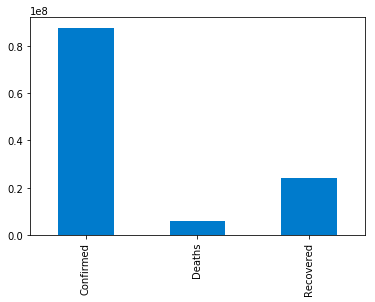

In [13]:
coronaVirus_df[['Confirmed', 'Deaths', 'Recovered']].sum().plot(kind='bar', color = '#007bcc')

### Recovery % vs Death % across the globe

Let's check recovered% and death% across the globe

In [14]:
Recovered_percent = (coronaVirus_df['Recovered'].sum() / coronaVirus_df['Confirmed'].sum()) * 100
print("% of people recovered from virus: ",Recovered_percent)

Death_percent = (coronaVirus_df['Deaths'].sum()/coronaVirus_df['Confirmed'].sum()) * 100
print("% of people died due to virus:", Death_percent)


% of people recovered from virus:  27.243511552859427
% of people died due to virus: 6.363502672330091


In [16]:
import plotly.graph_objects as go
grouped_multiple = coronaVirus_df.groupby(['ObservationDate']).agg({'Confirmed': ['sum']})
grouped_multiple.columns = ['Confirmed ALL']
grouped_multiple = grouped_multiple.reset_index()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=grouped_multiple['ObservationDate'], 
                         y=grouped_multiple['Confirmed ALL'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='red', width=2)))
fig.show()

### Geographical Widespread of CoronaVirus

Using the given data, Here are few questions which we are going to answer
1. Total number of countries whch are affected by the virus
2. Number of confirmed, recovered, deaths cases reported Country wise
2. Number of confirmed cases reported State/Province wise
3. Top 5 Affected Countries
4. Top 5 countries which are unaffected.
5. Distribution of virus in India and US population. 

In [17]:
# Total Number Of countries which are affected by the virus

countries= coronaVirus_df['Country'].unique()
total_countries= len(countries)
print('Total countries affected:',total_countries)
print('Countries affected are:',countries)

Total countries affected: 222
Countries affected are: ['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe 

In [18]:
# Number of confirmed cases reported Country wise

global_confirmed_cases = coronaVirus_df.groupby('Country').sum().Confirmed
global_confirmed_cases.sort_values(ascending=False)

Country
US                       25180513.0
Italy                     6979024.0
Mainland China            6977120.0
Spain                     6963720.0
Germany                   5192542.0
                            ...    
Republic of the Congo           1.0
North Ireland                   1.0
East Timor                      1.0
Channel Islands                 1.0
 Azerbaijan                     1.0
Name: Confirmed, Length: 222, dtype: float64

In [19]:
global_death_cases = coronaVirus_df.groupby('Country').sum().Deaths
global_death_cases.sort_values(ascending=False)

Country
US             1246634.0
Italy           875609.0
Spain           703058.0
France          607735.0
UK              520402.0
                 ...    
Madagascar           0.0
Mayotte              0.0
Mongolia             0.0
Mozambique           0.0
 Azerbaijan          0.0
Name: Deaths, Length: 222, dtype: float64

In [20]:
global_recovered_cases = coronaVirus_df.groupby('Country').sum().Recovered
global_recovered_cases.sort_values(ascending=False)

Country
Mainland China     5011829.0
Germany            2778958.0
Spain              2724610.0
US                 2474158.0
Iran               1916862.0
                     ...    
East Timor               0.0
Curacao                  0.0
Comoros                  0.0
Channel Islands          0.0
 Azerbaijan              0.0
Name: Recovered, Length: 222, dtype: float64

Text(0.5, 0, 'month')

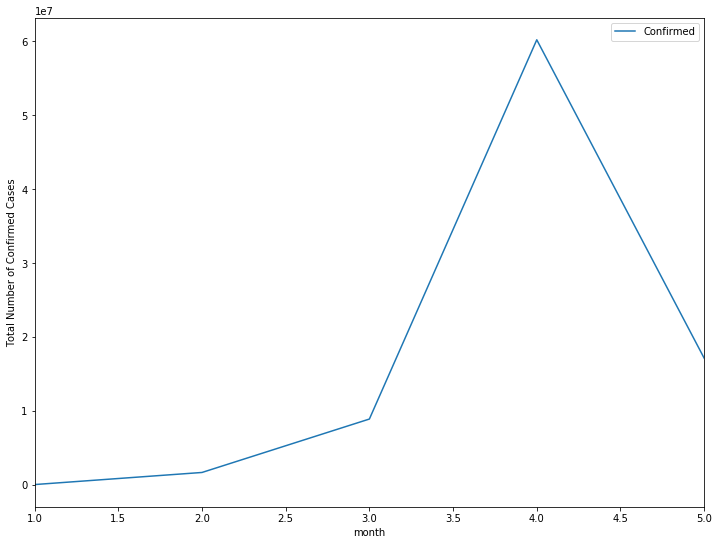

In [21]:
#plotting graphs for total Confirmed, Death and Recovery cases
plt.rcParams["figure.figsize"] = (12,9)
ax1 = coronaVirus_df[['month','Confirmed']].groupby(['month']).sum().plot()
ax1.set_ylabel("Total Number of Confirmed Cases")
ax1.set_xlabel("month")

#ax2 = coronaVirus_df[['date','Deaths', 'Recovered']].groupby(['date']).sum().plot()
#ax2.set_ylabel("Recovered and Deaths Cases")
#ax2.set_xlabel("date")

In [22]:
# Let's look the various Provinces/States affected

data_countryprovince = coronaVirus_df.groupby(['Country','State']).sum()
data_countryprovince.sort_values(by='Confirmed',ascending=False)

Confirmed    Deaths  Recovered  \
Country        State                                                          
US             New York                      7991649.0  505524.0        0.0   
Italy          Italy                         6979024.0  875609.0  1735338.0   
Spain          Spain                         6963720.0  703058.0  2724610.0   
Mainland China Hubei                         5748442.0  272915.0  4043369.0   
Germany        Germany                       5192525.0  146553.0  2778958.0   
...                                                ...       ...        ...   
Australia      Jervis Bay Territory                0.0       0.0        0.0   
               External territories                0.0       0.0        0.0   
               Diamond Princess cruise ship        0.0       0.0        0.0   
US             Montgomery County, TX               0.0       0.0        0.0   
Iraq           None                                0.0       0.0        0.0   

                                               year  month  date  
Country        State                                              
US             New York                      113120    207   829  
Italy          Italy                         191900    287  1412  
Spain          Spain                         189880    292  1221  
Mainland China Hubei                         210080    302  1576  
Germany        Germany                       189880    292  1281  
...                                             ...    ...   ...  
Australia      Jervis Bay Territory            2020      3     8  
               External territories            2020      3     8  
               Diamond Princess cruise ship   24240     33   210  
US             Montgomery County, TX           6060      9    21  
Iraq           None                            2020      2    23  

[516 rows x 6 columns]

In [23]:
# Top Affected countries

top_affected_countries = global_confirmed_cases.sort_values(ascending=False)
top_affected_countries.head(5)

Country
US                25180513.0
Italy              6979024.0
Mainland China     6977120.0
Spain              6963720.0
Germany            5192542.0
Name: Confirmed, dtype: float64

In [24]:
# Finding countries which are relatively safe due to less number of reported cases
top_unaffected_countries = global_confirmed_cases.sort_values(ascending=True)
top_unaffected_countries.head(5)

Country
 Azerbaijan              1.0
Channel Islands          1.0
East Timor               1.0
North Ireland            1.0
Republic of the Congo    1.0
Name: Confirmed, dtype: float64

Above list are unaffected countries which means that relative to other countries, there are very less number of cases reported. These countries should take all measures to prevent spreading the virus.

### Plotting cases confirmed in China

In [25]:
#Mainland China
China_data = coronaVirus_df[coronaVirus_df['Country']=='Mainland China']
China_data

,State,Country,Last Update,Confirmed,Deaths,Recovered,year,month,date,time
ObservationDate,,,,,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,17:00:00
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020,1,22,17:00:00
...,...,...,...,...,...,...,...,...,...,...
2020-05-04,Tianjin,Mainland China,2020-05-05 02:32:34,190.0,3.0,186.0,2020,5,5,02:32:34
2020-05-04,Tibet,Mainland China,2020-05-05 02:32:34,1.0,0.0,1.0,2020,5,5,02:32:34
2020-05-04,Xinjiang,Mainland China,2020-05-05 02:32:34,76.0,3.0,73.0,2020,5,5,02:32:34


In [26]:
x = China_data.groupby('State')['Confirmed'].sum().sort_values().tail(15)

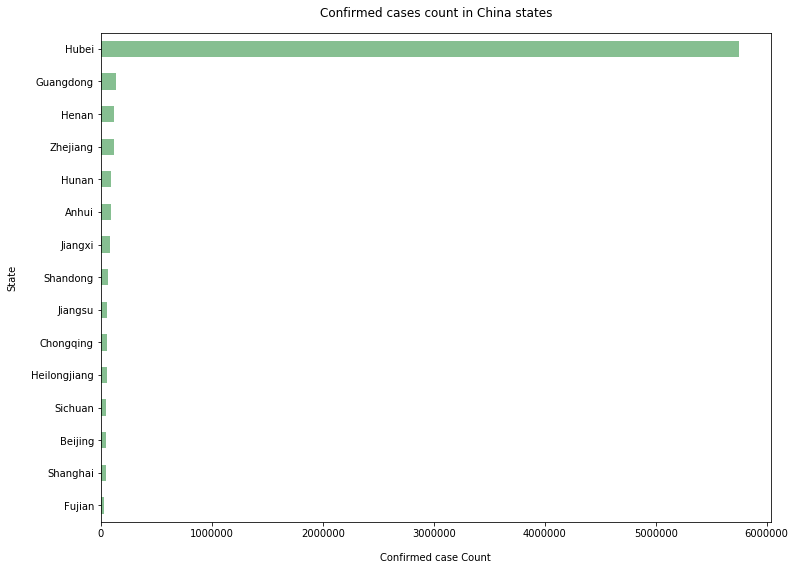

In [27]:
x.plot(kind='barh', color='#86bf91')
plt.xlabel("Confirmed case Count", labelpad=14)
plt.ylabel("State", labelpad=14)
plt.title("Confirmed cases count in China states", y=1.02);

1. > ### ****Geographical Distribution in India and US ****

> Now let's understand distribution of virus in US population

In [28]:
US_data = coronaVirus_df[coronaVirus_df['Country']=='US']
US_data

,State,Country,Last Update,Confirmed,Deaths,Recovered,year,month,date,time
ObservationDate,,,,,,,,,,
2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,2020,1,22,17:00:00
2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0,2020,1,23,17:00:00
2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0,2020,1,24,17:00:00
2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,2020,1,24,17:00:00
2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0,2020,1,25,17:00:00
...,...,...,...,...,...,...,...,...,...,...
2020-05-04,Virginia,US,2020-05-05 02:32:34,19493.0,684.0,0.0,2020,5,5,02:32:34
2020-05-04,Washington,US,2020-05-05 02:32:34,15462.0,841.0,0.0,2020,5,5,02:32:34
2020-05-04,West Virginia,US,2020-05-05 02:32:34,1224.0,48.0,0.0,2020,5,5,02:32:34


In [29]:
x = US_data.groupby('State')['Confirmed'].sum().sort_values(ascending=False).tail(20)
x

State
Spokane County, WA         2.0
Suffolk County, NY         2.0
Davidson County, TN        2.0
Collin County, TX          1.0
Norwell County, MA         1.0
Shasta County, CA          1.0
Spartanburg County, SC     1.0
Bennington County, VT      1.0
Jefferson Parish, LA       1.0
Jefferson County, KY       1.0
Carver County, MN          1.0
Queens County, NY          1.0
Charlotte County, FL       1.0
Santa Cruz County, CA      1.0
Cherokee County, GA        1.0
Chicago                    1.0
Unassigned Location, VT    1.0
Montgomery County, TX      0.0
Recovered                  0.0
American Samoa             0.0
Name: Confirmed, dtype: float64

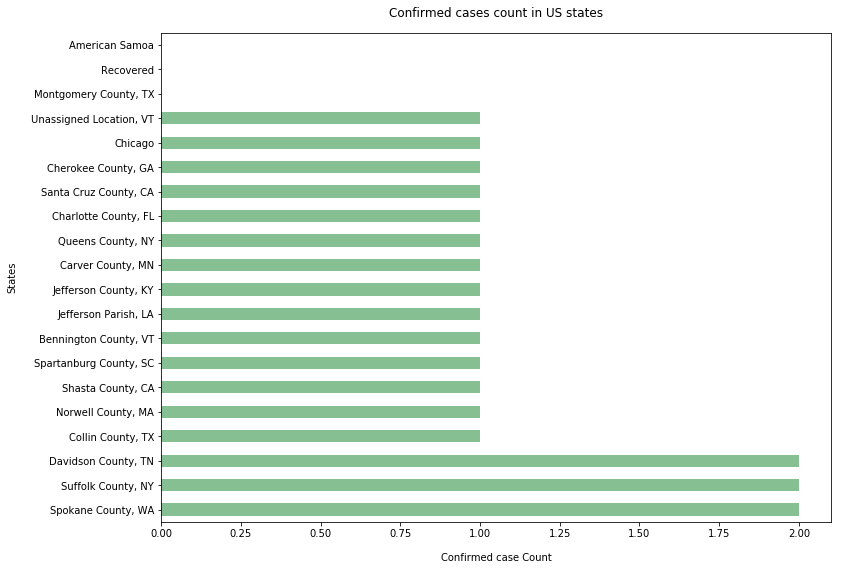

In [30]:
x.plot(kind='barh', color='#86bf91')
plt.xlabel("Confirmed case Count", labelpad=14)
plt.ylabel("States", labelpad=14)
plt.title("Confirmed cases count in US states", y=1.02);

### Coronavirus spread in India

In [31]:
India_data = coronaVirus_df[coronaVirus_df['Country']=='India']
India_data

,State,Country,Last Update,Confirmed,Deaths,Recovered,year,month,date,time
ObservationDate,,,,,,,,,,
2020-01-30,India,India,1/30/20 16:00,1.0,0.0,0.0,2020,1,30,16:00:00
2020-01-31,India,India,1/31/2020 23:59,1.0,0.0,0.0,2020,1,31,23:59:00
2020-02-01,India,India,1/31/2020 8:15,1.0,0.0,0.0,2020,1,31,08:15:00
2020-02-02,India,India,2020-02-02T06:03:08,2.0,0.0,0.0,2020,2,2,06:03:08
2020-02-03,India,India,2020-02-03T21:43:02,3.0,0.0,0.0,2020,2,3,21:43:02
...,...,...,...,...,...,...,...,...,...,...
2020-04-30,India,India,2020-05-01 02:32:28,34863.0,1154.0,9068.0,2020,5,1,02:32:28
2020-05-01,India,India,2020-05-02 02:32:27,37257.0,1223.0,10007.0,2020,5,2,02:32:27
2020-05-02,India,India,2020-05-03 02:32:28,39699.0,1323.0,10819.0,2020,5,3,02:32:28


## Time Series Analysis

It is important to understand correlation of time and cases reported. 

In [35]:
# Using plotly.express
import plotly.express as px

import pandas as pd

fig = px.line(coronaVirus_df, x='Last Update', y='Confirmed')
fig.show()

SyntaxError: invalid syntax (<ipython-input-35-e633b613ed19>, line 1)

In [ ]:

fig = px.line(coronaVirus_df, x='Last Update', y='Deaths')
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df['date'],
                y=coronaVirus_df['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['date'],
                y=coronaVirus_df['Recovered'],
                name="Recovered",
                line_color='dimgray',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['date'],
                y=coronaVirus_df['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22','2020-03-10'],
                  title_text="Cases over time")
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df['date'],
                y=coronaVirus_df['Recovered'],
                name="Recovered",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=coronaVirus_df['date'],
                y=coronaVirus_df['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22 00:00:00','2020-03-10 23:59:59'],
                  title_text="Recovered vs Deaths over time in China")
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=coronaVirus_df.time,
                y=coronaVirus_df['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-31','2020-02-03'],
                  title_text="Confirmed Cases over time")
fig.show()

As of now this is our EDA. We need to predict future cases and build models which will be coming soon. 

## References

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://www.who.int/health-topics/coronavirus

https://plot.ly/python/time-series/

https://plot.ly/python/bubble-maps/#base-map-configuration

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

https://en.wikipedia.org/wiki/Coronavirus

